<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
import random

Create Dataset:

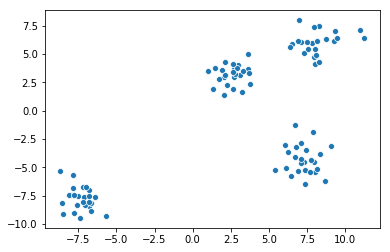

In [2]:
m = 100
X, _ = make_blobs(n_samples=m, centers=4, n_features=2)
sns.scatterplot(x=X[:, 0], y=X[:, 1])

Initialize Centroids

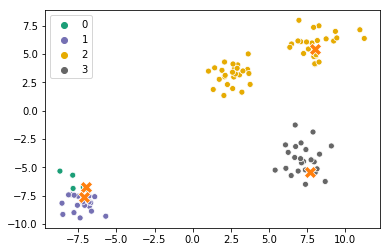

In [3]:
K = 4  # K < m
mu = X[random.sample(range(m), K)]
c = np.moveaxis(np.subtract.outer(X, mu)[:,[0,1],:,[0,1]], 0, -1)  # calculate outer matrix for difference between X and mu
c = np.sum(c**2, axis=2)  # calculate magnitude of difference vectors
c = np.argmin(c, axis=1)  # determine closest mu for each x
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=c, palette='Dark2')
sns.scatterplot(x=mu[:, 0], y=mu[:, 1], marker='X', s=150)

Run K-Means Algorithm

In [0]:
iterations = 100
repeats = 10

def cost(X, mu):
  cost = np.moveaxis(np.subtract.outer(X, mu)[:,[0,1],:,[0,1]], 0, -1)
  cost = np.min(np.sum(cost**2, axis=2), axis=1)
  return sum(cost)

mu_best = np.copy(mu)
cost_best = cost(X, mu)

for repeat in range(repeats):
  mu = X[random.sample(range(m), K)]
  for i in range(iterations):
    ## Calculate c's
    c = np.moveaxis(np.subtract.outer(X, mu)[:,[0,1],:,[0,1]], 0, -1)  # calculate outer matrix for difference between X and mu
    c = np.sum(c**2, axis=2)  # calculate magnitude of difference vectors
    c = np.argmin(c, axis=1)  # determine closest mu for each x

    ## Update mu's
    for i in range(K):
      num_points = sum(c==i)
      mu[i] = np.sum(X[c==i], axis=0)/num_points
  
  ## If better, save in mu_best
  cost_i = cost(X, mu)
  if cost_i < cost_best:
    cost_best = cost_i
    mu_best = np.copy(mu)

Graph Results

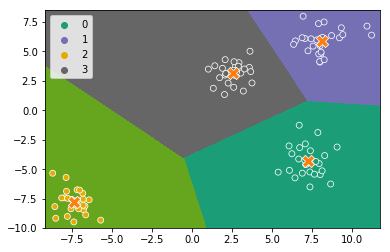

In [7]:
# Calculate c's for mu_best
c = np.moveaxis(np.subtract.outer(X, mu_best)[:,[0,1],:,[0,1]], 0, -1)
c = np.sum(c**2, axis=2)
c = np.argmin(c, axis=1)

# Prepare Contour data
x_min = min(X[:, 0]) - 0.5
x_max = max(X[:, 0]) + 0.5
y_min = min(X[:, 1]) - 0.5
y_max = max(X[:, 1]) + 0.5
step = 0.005
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
d = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)
num_points = d.shape[0]

Z = np.moveaxis(np.subtract.outer(d, mu_best)[:,[0,1],:,[0,1]], 0, -1)
Z = np.sum(Z**2, axis=2)
Z = np.argmin(Z, axis=1)
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, cmap=cm.Dark2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=c, palette=cm.Dark2, ax=ax)
sns.scatterplot(x=mu_best[:, 0], y=mu_best[:, 1], marker='X', s=150, ax=ax)
plt.show()